In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from pymoo.visualization.pcp import PCP
from numpy import array, save, load
import copy
%matplotlib inline

In [14]:
results = pd.read_csv('results.csv')

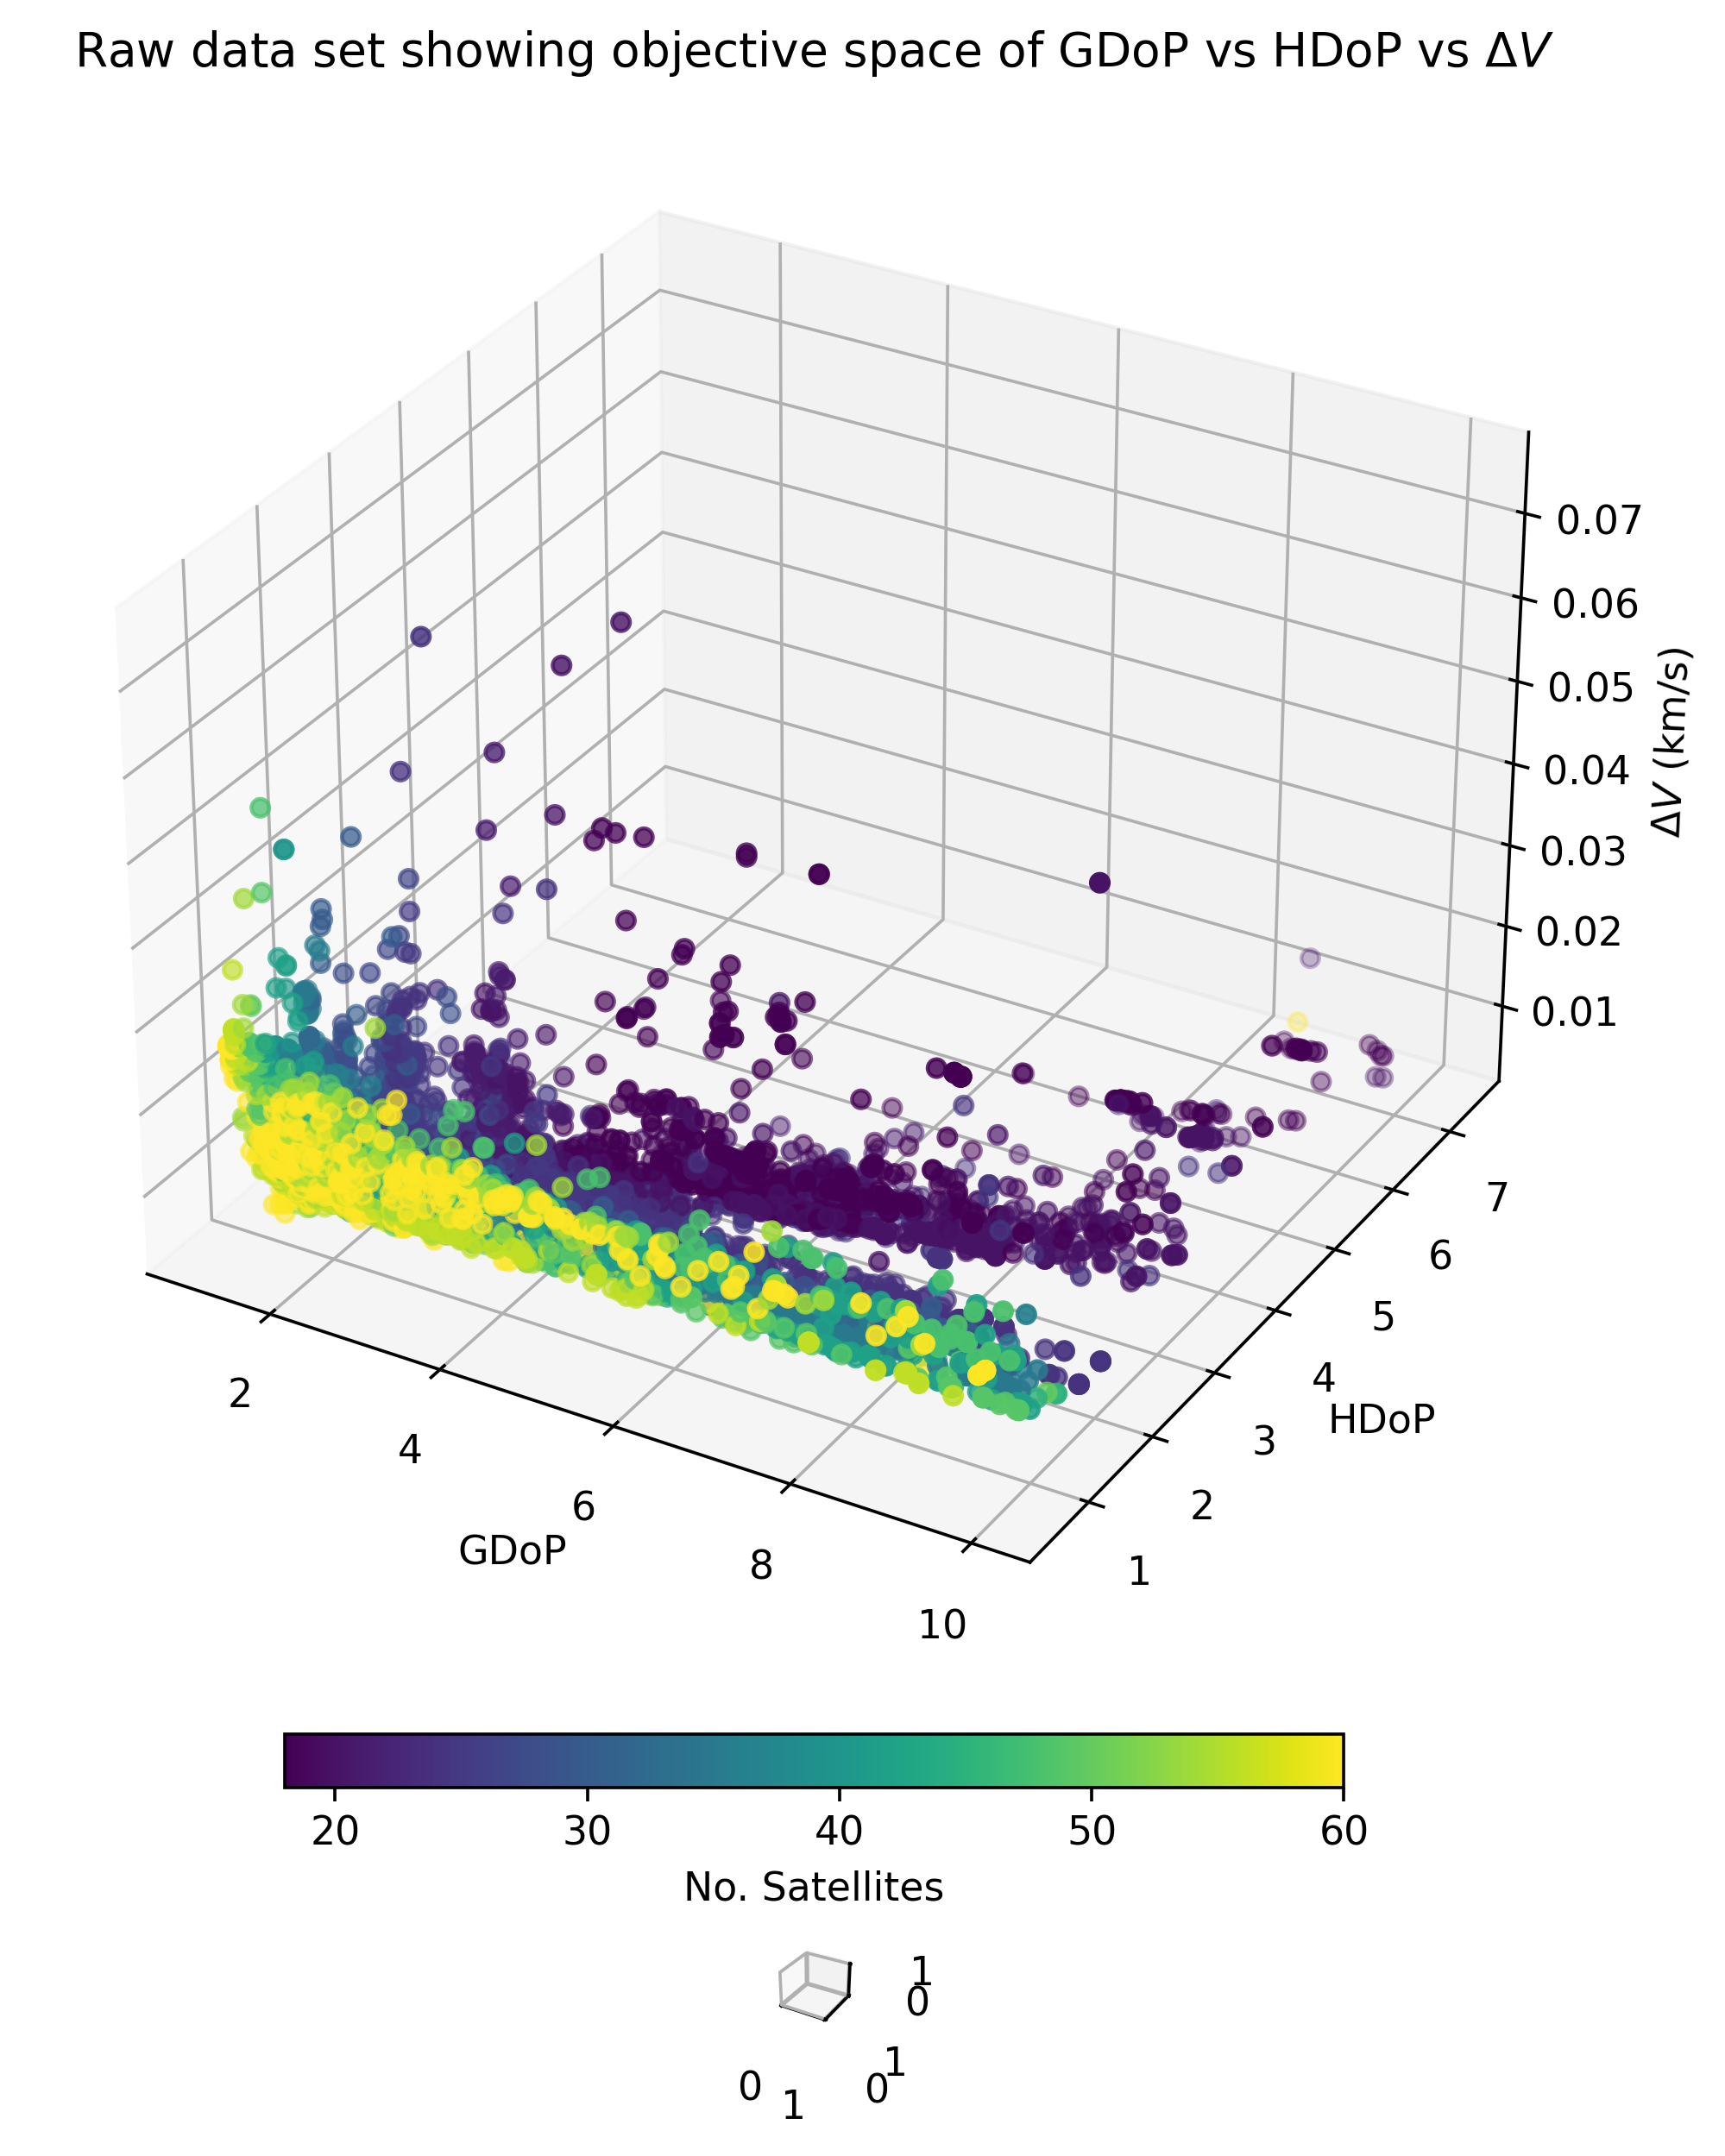

In [15]:
fig, ax = plt.subplots(figsize=(8,9), dpi=330, subplot_kw={'projection': '3d'})

a = ax.scatter(results['GDoP'], results['HDoP'], results['dV'], c = results['T'])
ax.set_xlabel('GDoP')
ax.set_ylabel('HDoP')
ax.set_zlabel(r'$\Delta V$'+" (km/s)")
ax.set_title("Raw data set showing objective space of GDoP vs HDoP vs " + r'$\Delta V$')

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=1, pack_start=True)
fig.add_axes(cax)

plt.colorbar(a, ax=cax, label="No. Satellites", orientation="horizontal", shrink=0.6)

plt.savefig('resultsRaw.png', transparent=1, bbox_inches='tight')
plt.show()

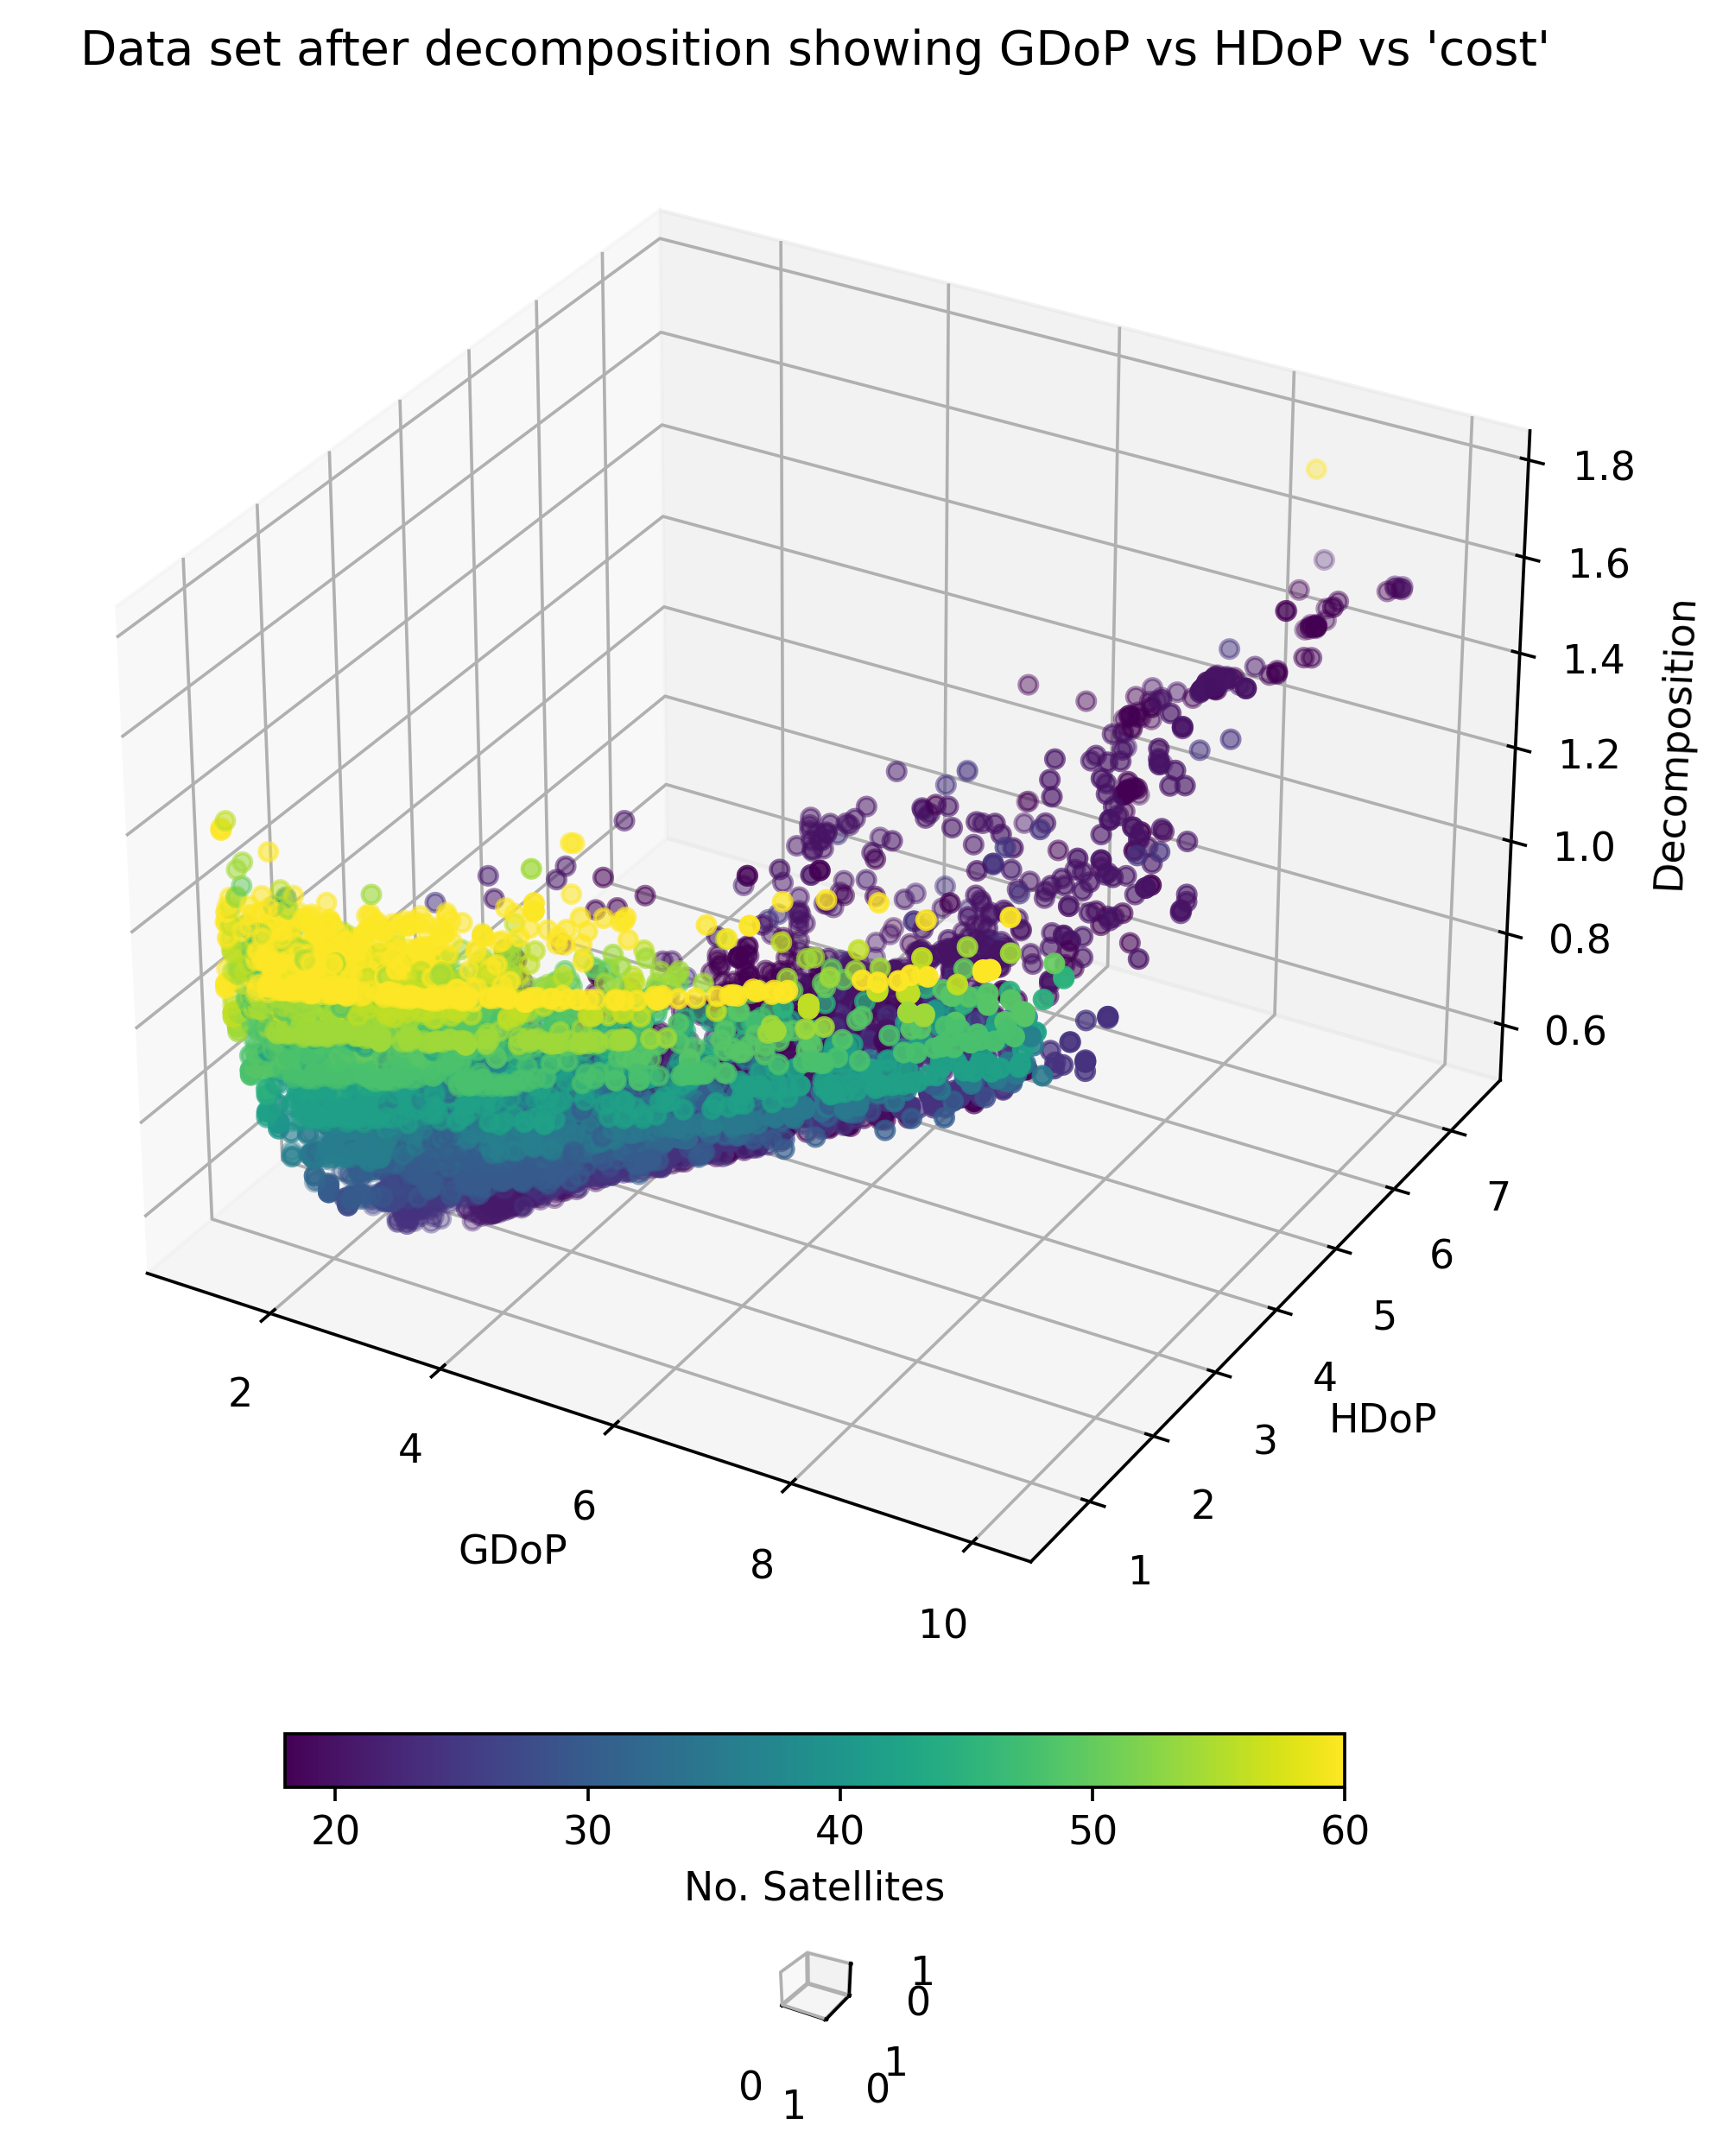

In [16]:
fig, ax = plt.subplots(figsize=(8,9), dpi=330, subplot_kw={'projection': '3d'})

a = ax.scatter(results['GDoP'], results['HDoP'], results['Decomp'], c = results['T'])
ax.set_xlabel('GDoP')
ax.set_ylabel('HDoP')
ax.set_zlabel('Decomposition')
ax.set_title("Data set after decomposition showing GDoP vs HDoP vs 'cost'")

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=1, pack_start=True)
fig.add_axes(cax)

plt.colorbar(a, ax=cax, label="No. Satellites", orientation="horizontal", shrink=0.6)

plt.savefig('resultsDecomp.png', transparent=1, bbox_inches='tight')
plt.show()

In [17]:
results['a'] = results['a'].round(2)
results['e'] = results['e'].round(4)
results['i'] = results['i'].round(2)
results['aop'] = results['aop'].round(2)
results['f'] = results['f'].round(4)
results['GDoP'] = results['GDoP'].round(2)
results['HDoP'] = results['HDoP'].round(2)
results['Decomp'] = results['Decomp'].round(4)
results['T'] = results['T'].astype('int64')

In [18]:
# Best result
best = results.loc[results['Decomp'].idxmin()]
print(best)
best.to_csv('best.csv', index_label=False, index=False)

a         24572.820000
e             0.000000
i            58.690000
aop          22.900000
s             4.000000
p             6.000000
f             0.211800
GDoP          2.600000
HDoP          1.200000
dV            0.026645
T            24.000000
Decomp        0.565400
Name: 9437, dtype: float64


In [19]:
# Best result
bestOverall = results.loc[results['Decomp'].idxmin()]
print(bestOverall)
bestOverall.to_csv('bestOverall.csv', index_label=False, index=False)

a         24572.820000
e             0.000000
i            58.690000
aop          22.900000
s             4.000000
p             6.000000
f             0.211800
GDoP          2.600000
HDoP          1.200000
dV            0.026645
T            24.000000
Decomp        0.565400
Name: 9437, dtype: float64


In [20]:
# Best GDoP
bestGDoP = results.loc[results['GDoP'].idxmin()]
print(bestGDoP)
bestGDoP.to_csv('bestGDoP.csv', index_label=False, index=False)

a         24493.160000
e             0.001300
i            67.950000
aop          97.720000
s             6.000000
p            10.000000
f             0.450700
GDoP          1.170000
HDoP          0.610000
dV            0.026994
T            60.000000
Decomp        1.067000
Name: 6456, dtype: float64


In [21]:
# Best HDoP
bestHDoP = results.loc[results['HDoP'].idxmin()]
print(bestHDoP)
bestHDoP.to_csv('bestHDoP.csv', index_label=False, index=False)

a         22288.600000
e             0.021500
i            59.620000
aop         311.170000
s             6.000000
p            10.000000
f             0.113300
GDoP          1.500000
HDoP          0.600000
dV            0.016803
T            60.000000
Decomp        1.248300
Name: 689, dtype: float64


In [22]:
# Best dV
bestdV = results.loc[results['dV'].idxmin()]
print(bestdV)
bestdV.to_csv('bestdV.csv', index_label=False, index=False)

a         10920.350000
e             0.010100
i            65.420000
aop          90.960000
s             6.000000
p             4.000000
f             0.009300
GDoP          7.400000
HDoP          3.960000
dV            0.005551
T            24.000000
Decomp        1.247100
Name: 5847, dtype: float64


In [23]:
#Best ten
bestTen = results.nsmallest(10, 'Decomp')
print(bestTen)
bestTen.to_csv('bestTen.csv', index_label=False, index=False)

             a       e      i     aop  s  p       f  GDoP  HDoP        dV   T  \
9437  24572.82  0.0000  58.69   22.90  4  6  0.2118  2.60  1.20  0.026645  24   
9362  24531.88  0.0000  58.69   22.90  4  6  0.3923  2.61  1.20  0.026540  24   
9724  26652.79  0.0000  67.38  298.14  4  6  0.3019  2.64  1.25  0.026155  24   
9234  24589.38  0.0139  66.50  132.95  8  3  0.4641  2.62  1.30  0.020459  24   
9805  24704.18  0.0065  68.45  134.34  8  3  0.4607  2.64  1.31  0.022001  24   
9254  27211.87  0.0001  67.38  298.14  3  8  0.3019  2.71  1.23  0.031698  24   
9311  27813.93  0.0001  64.37  298.14  3  8  0.3019  2.73  1.22  0.032898  24   
8216  19148.24  0.0245  56.24   74.77  3  8  0.6778  2.75  1.16  0.015102  24   
8611  19148.24  0.0245  56.07   74.77  3  8  0.6778  2.75  1.16  0.015067  24   
9221  22352.59  0.0430  60.35  291.96  3  7  0.5864  3.29  1.44  0.016215  21   

      Decomp  
9437  0.5654  
9362  0.5659  
9724  0.5706  
9234  0.5711  
9805  0.5722  
9254  0.5726  
931